In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
#Confidence Interval-esque....error of estimates given sample size and known probability
def bern_sample_error(actual_probability, sample_size):
    positives = np.random.binomial(sample_size, actual_probability)
    estimated_probability = positives/float(sample_size)
    error = actual_probability - estimated_probability
    percent_error = error/float(actual_probability)
    return error, percent_error

In [23]:
class error_summaries:
    def __init__(self,
                 sample_size_min,
                 sample_size_max,
                 sample_size_step,
                 prob,
                 repetitions_per_cycle=100):
        self.sample_size_min = sample_size_min
        self.sample_size_max = sample_size_max
        self.sample_size_step = sample_size_step
        self.prob = prob
        self.repetitions_per_cycle = repetitions_per_cycle
        self.x = []
        self.ye_mean = []
        self.ype_mean = []
        self.ye_std = []
        self.ype_std = []
        for sample_size in range(sample_size_min, sample_size_max, sample_size_step):
            errors = []
            p_errors = []
            for i in range(repetitions_per_cycle):
                e, p = bern_sample_error(prob, sample_size)
                errors.append(e)
                p_errors.append(p)
            self.x.append(sample_size)
            self.ye_mean.append(np.mean(errors))
            self.ype_mean.append(np.mean(p_errors))
            self.ye_std.append(np.std(errors))
            self.ype_std.append(np.std(p_errors))

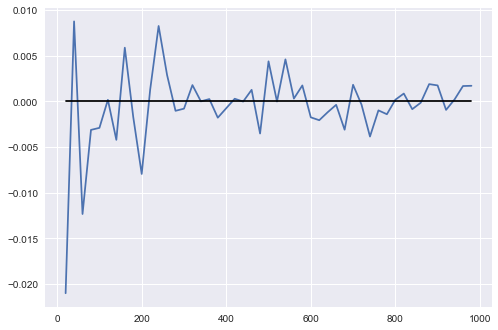

In [63]:
e_1to2 = error_summaries(20,1000,20, .5)
plt.plot(e_1to2.x, e_1to2.ye_mean)
plt.plot(e_1to2.x, [0 for i in e_1to2.x], c='black')

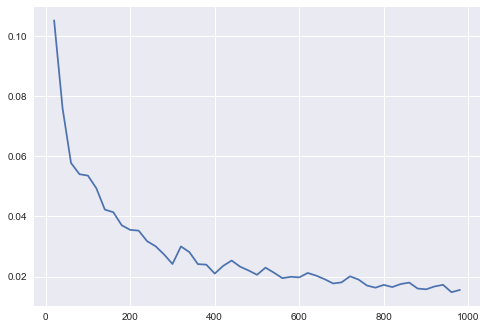

In [64]:
#Standard Deviation of the .5 Estimand VS. Sample Size
#(100 repetitions for each sample size used to calculate std)
plt.plot(e_1to2.x, e_1to2.ye_std)

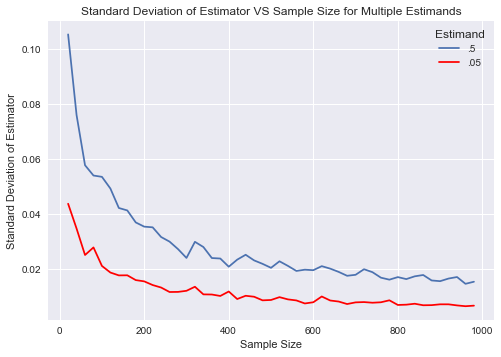

In [65]:
e_1to20 = error_summaries(20,1000,20,.05)
plt.plot(e_1to2.x, e_1to2.ye_std, label='.5')
plt.plot(e_1to20.x, e_1to20.ye_std, c='red', label='.05')
plt.legend(title="Estimand")
plt.title('Standard Deviation of Estimator VS Sample Size for Multiple Estimands')
plt.ylabel('Standard Deviation of Estimator')
plt.xlabel('Sample Size')

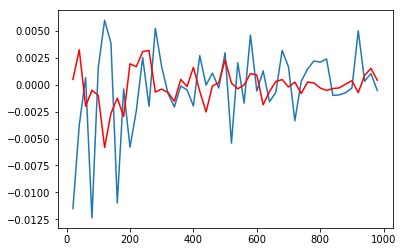

In [28]:
plt.plot(e_1to2.x, e_1to2.ye_mean)
plt.plot(e_1to20.x, e_1to20.ye_mean, c='red')

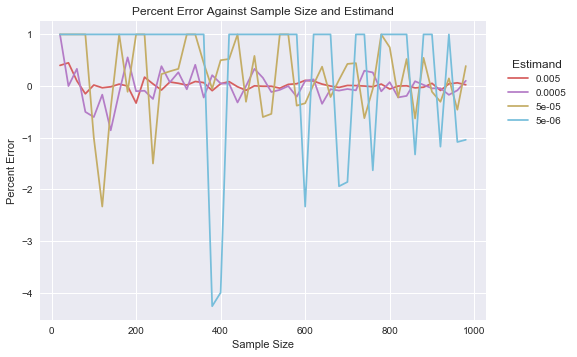

In [62]:
#Percent Error Sample Size vs Estimand
for i in range(2,6):
    px_denom = 2*10**i
    errs = error_summaries(20,1000,20, 1/px_denom)
    plt.plot(errs.x, errs.ype_mean, c = sns.color_palette("muted", 8)[i], label=1/px_denom)
plt.legend(bbox_to_anchor=(1.2,0.9), title='Estimand')
plt.title('Percent Error Against Sample Size and Estimand')
plt.ylabel('Percent Error')
plt.xlabel('Sample Size')

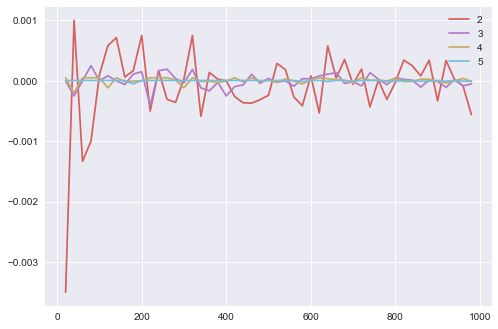

In [48]:
for i in range(2,6):
    px_denom = 2*10**i
    errs = error_summaries(20,1000,20, 1/px_denom)
    plt.plot(errs.x, errs.ye_mean, c = sns.color_palette("muted", 8)[i], label=i)
plt.legend(loc=1)

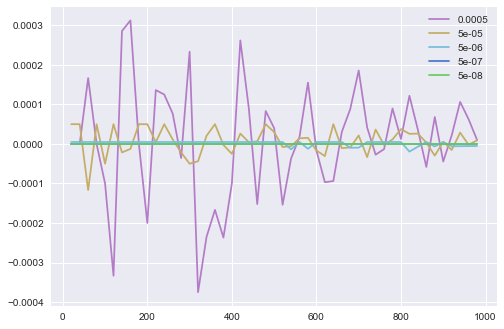

In [52]:
for i in range(3,8):
    px_denom = 2*10**i
    errs = error_summaries(20,1000,20, 1/px_denom)
    plt.plot(errs.x, errs.ye_mean, c = sns.color_palette("muted", 8)[i], label=1/px_denom)
plt.legend(loc=1)